In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
import seaborn as sns
sns.set(style="whitegrid")

In [37]:
#os
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [32]:
#windows
plt.rcParams['font.sans-serif'] = ['simhei']

In [28]:
#读取数据
df_origin = pd.read_csv('unique.csv')

In [4]:
df_origin.shape

(22293, 13)

In [5]:
df_origin.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59,199
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49,149
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49,89
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49,59
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9,22


In [6]:
#探索
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_id      22293 non-null  int64  
 1   city          22293 non-null  object 
 2   channel       22293 non-null  object 
 3   gender_group  22293 non-null  object 
 4   age_group     22293 non-null  object 
 5   wkd_ind       22293 non-null  object 
 6   product       22293 non-null  object 
 7   customer      22293 non-null  int64  
 8   revenue       22293 non-null  float64
 9   order         22293 non-null  int64  
 10  quant         22293 non-null  int64  
 11  unit_cost     22293 non-null  int64  
 12  unit_price    22293 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 2.2+ MB


In [7]:
df_origin.describe(include='all')

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price
count,22293.000000,22293,22293,22293,22293,22293,22293,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000
unique,NaN,10,2,3,11,2,9,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,深圳,线下,Female,30-34,Weekday,T恤,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4364,18403,14208,4426,12465,10610,NaN,NaN,NaN,NaN,NaN,NaN
mean,335.391558,NaN,NaN,NaN,NaN,NaN,NaN,1.629480,159.531371,1.651998,1.858072,46.124658,84.279998
std,230.236167,NaN,NaN,NaN,NaN,NaN,NaN,1.785605,276.254066,1.861480,2.347301,19.124347,46.314296
min,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.660000,1.000000,1.000000,9.000000,0.000000
25%,142.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,64.000000,1.000000,1.000000,49.000000,56.000000
50%,315.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,99.000000,1.000000,1.000000,49.000000,79.000000
75%,480.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,175.000000,2.000000,2.000000,49.000000,99.000000


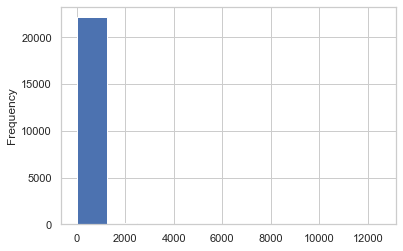

In [8]:
df_origin['revenue'].plot(kind='hist');

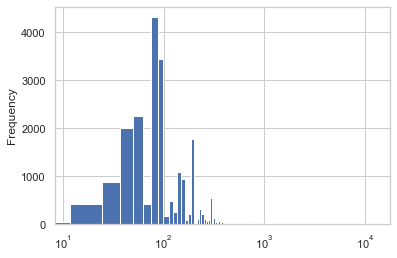

In [9]:
df_origin['revenue'].plot(kind='hist',logx=True,bins=1000);

In [10]:
df_origin[df_origin['revenue']<0]

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price
20049,91,武汉,线上,Female,55-59,Weekday,运动,1,-0.66,1,2,49,0


In [11]:
df_clean = df_origin.copy()

In [12]:
#删除小于零的这条
drop_idx = df_clean[df_clean['revenue']<0].index
df_clean = df_clean.drop(drop_idx)

In [13]:
#store_id应该是str类型
df_clean['store_id'] = df_clean['store_id'].astype(str)

In [14]:
#增加计算字段
#人均订单量order/customer
#人均购买商品量quant/customer
#订单平均包含商品量quant/order
#商品平均销售额revenue/quant
#人均消费额revenue/customer
#利润商品平均销售额-unit_cost
df_clean['uni_order_num'] = df_clean['order']/df_clean['customer']
df_clean['uni_quant_num'] = df_clean['quant']/df_clean['customer']
df_clean['uni_quant_of_order'] = df_clean['quant']/df_clean['order']
df_clean['uni_revenue_of_product'] = df_clean['revenue']/df_clean['quant']
df_clean['uni_revenue_of_customer'] = df_clean['revenue']/df_clean['customer']
df_clean['margin'] = df_clean['uni_revenue_of_product'] - df_clean['unit_cost']

In [20]:
df_clean.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price,uni_order_num,uni_quant_num,uni_quant_of_order,uni_revenue_of_product,uni_revenue_of_customer,margin
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59,199,1.0,1.0,1.0,199.000000,199.0,140.000000
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49,149,1.0,1.0,1.0,149.000000,149.0,100.000000
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49,89,1.0,1.0,1.0,89.000000,89.0,40.000000
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49,59,1.0,1.0,1.0,59.000000,59.0,10.000000
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9,22,1.0,1.5,1.5,21.666667,32.5,12.666667


In [21]:
#对city进行分类统计
value_count_df = pd.DataFrame(df_clean['city'].value_counts()).reset_index()

In [22]:
#更改列名
value_count_df = value_count_df.rename(columns={'index':'city','city':'count'})

In [23]:
value_count_df

,city,count
0,深圳,4364
1,杭州,3785
2,武汉,3566
3,上海,2391
4,广州,2188
5,重庆,1787
6,西安,1605
7,成都,1529
8,北京,577
9,南京,500


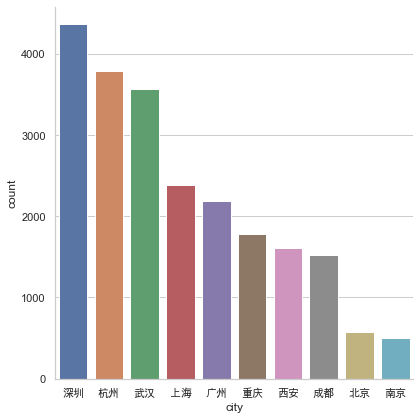

In [31]:
#绘图
sns.catplot(x='city', y="count",data=value_count_df,height=6, kind="bar");

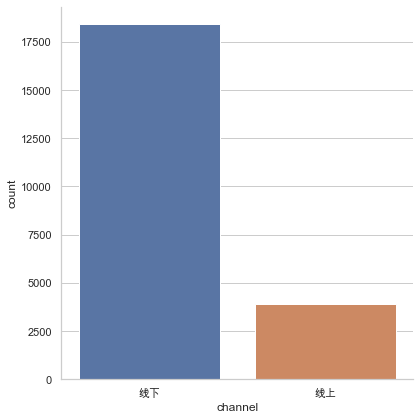

In [38]:
#对channel进行分类统计
value_count_df = pd.DataFrame(df_clean['channel'].value_counts()).reset_index()
#更改列名
value_count_df = value_count_df.rename(columns={'index':'channel','channel':'count'})
#绘图
sns.catplot(x='channel', y="count",data=value_count_df,height=6, kind="bar");

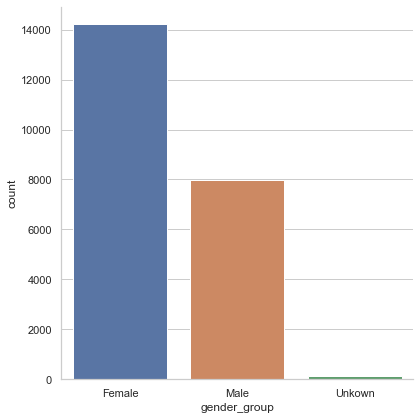

In [39]:
#对age_group进行分类统计
value_count_df = pd.DataFrame(df_clean['gender_group'].value_counts()).reset_index()
#更改列名
value_count_df = value_count_df.rename(columns={'index':'gender_group','gender_group':'count'})
#绘图
sns.catplot(x='gender_group', y="count",data=value_count_df,height=6, kind="bar");

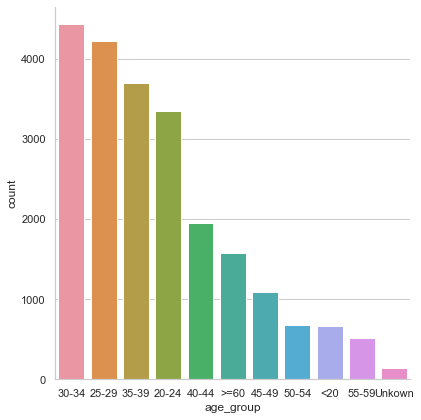

In [40]:
#对age_group进行分类统计
value_count_df = pd.DataFrame(df_clean['age_group'].value_counts()).reset_index()
#更改列名
value_count_df = value_count_df.rename(columns={'index':'age_group','age_group':'count'})
#绘图
sns.catplot(x='age_group', y="count",data=value_count_df,height=6, kind="bar");

In [41]:
age_orders = ['<20','20-24','25-29',  '30-34','35-39',  '40-44','45-49', '50-54','55-59','>=60', 'Unkown']

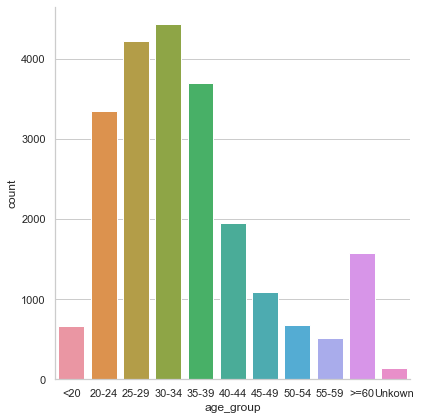

In [42]:
#对age_group进行分类统计
value_count_df = pd.DataFrame(df_clean['age_group'].value_counts()).reset_index()
#更改列名
value_count_df = value_count_df.rename(columns={'index':'age_group','age_group':'count'})
#绘图
sns.catplot(x='age_group', y="count",data=value_count_df,height=6, kind="bar",order=age_orders);

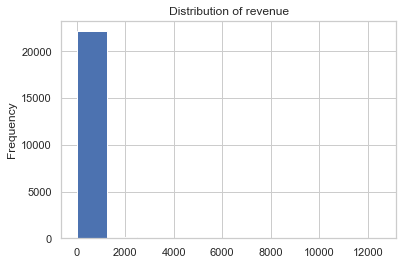

In [25]:
#revenue
df_clean['revenue'].plot(kind='hist',title='Distribution of revenue');

In [43]:
df_clean['revenue'].describe()

count    22292.000000
mean       159.538557
std        276.258179
min          0.000000
25%         64.000000
50%         99.000000
75%        175.000000
max      12538.000000
Name: revenue, dtype: float64

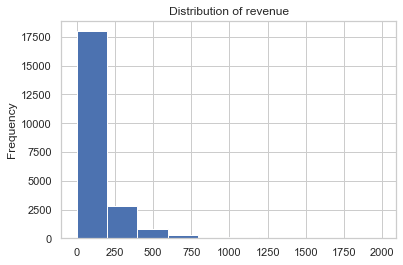

In [44]:
df_clean[df_clean['revenue']< 2000]['revenue'].plot(kind='hist',title='Distribution of revenue');

In [45]:
#渠道表现
#添加辅助列
df_clean['count'] = 1

In [46]:
df_clean.groupby(['channel','wkd_ind'])['count'].count()

channel  wkd_ind
线上       Weekday     2216
         Weekend     1673
线下       Weekday    10248
         Weekend     8155
Name: count, dtype: int64

In [47]:
tmp = df_clean.groupby(['channel','wkd_ind'])['count'].count()

In [48]:
tmp = tmp.reset_index()

In [49]:
tmp

,channel,wkd_ind,count
0,线上,Weekday,2216
1,线上,Weekend,1673
2,线下,Weekday,10248
3,线下,Weekend,8155


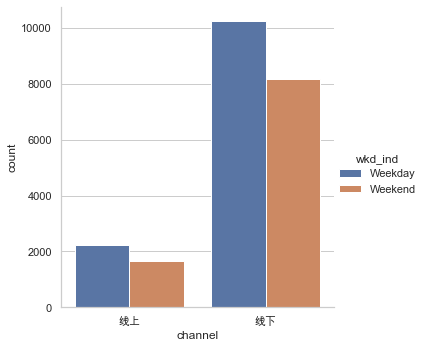

In [50]:
sns.catplot(x='channel',y='count',hue='wkd_ind',kind='bar',data=tmp);

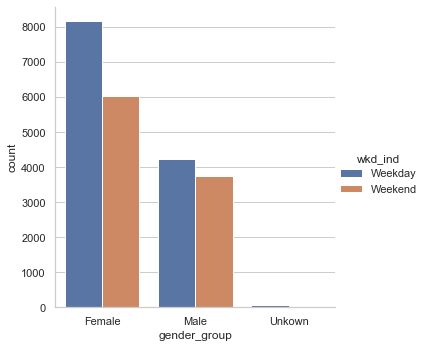

In [35]:
#性别表现
tmp = df_clean.groupby(['gender_group','wkd_ind'])['count'].count()
tmp = tmp.reset_index()
sns.catplot(x='gender_group',y='count',hue='wkd_ind',kind='bar',data=tmp);

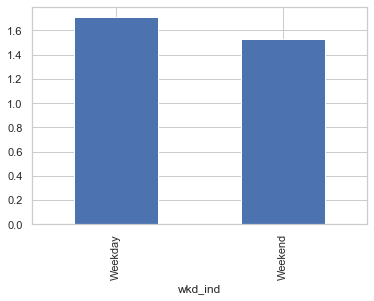

In [38]:
#购买时间情况
df_clean.groupby('wkd_ind')['customer'].mean().plot(kind='bar');

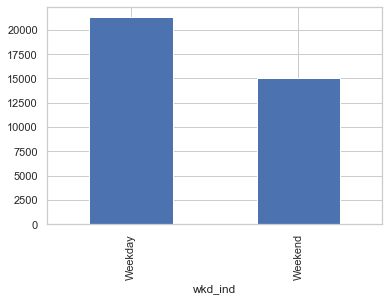

In [39]:
df_clean.groupby('wkd_ind')['customer'].sum().plot(kind='bar');

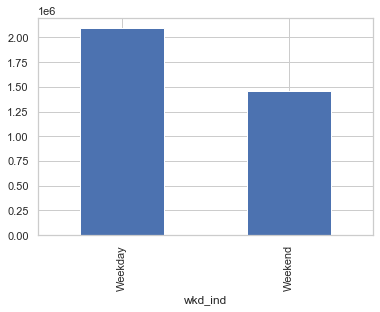

In [40]:
df_clean.groupby('wkd_ind')['revenue'].sum().plot(kind='bar');

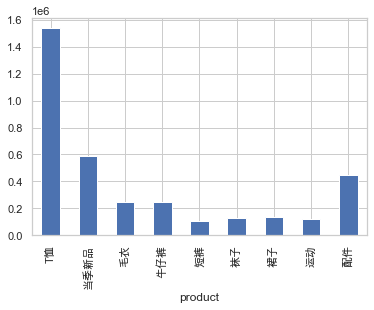

In [51]:
#不同产品的销售情况
df_clean.groupby('product')['revenue'].sum().plot(kind='bar');

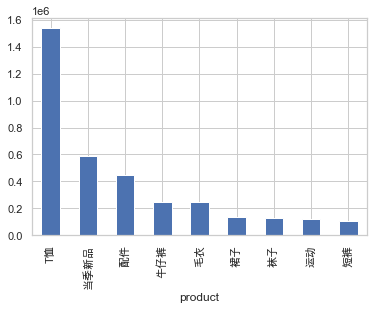

In [52]:
df_clean.groupby('product')['revenue'].sum().sort_values(ascending=False).plot(kind='bar');

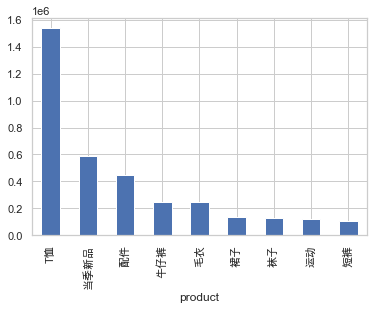

In [53]:
#总销售额
df_clean.groupby('product')['revenue'].sum().sort_values(ascending=False).plot(kind='bar');

- 销售额等变量的对比

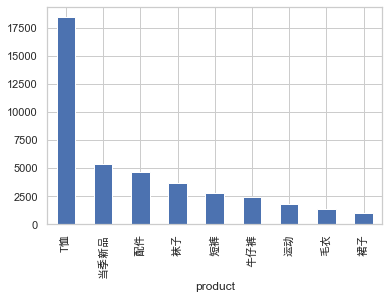

In [54]:
#总销售数量
df_clean.groupby('product')['quant'].sum().sort_values(ascending=False).plot(kind='bar');

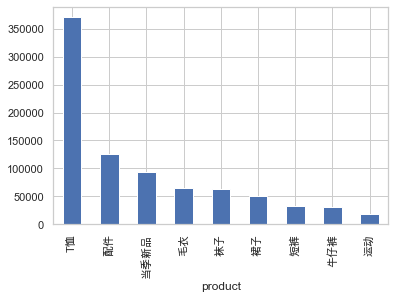

In [55]:
#利润
df_clean.groupby('product')['margin'].sum().sort_values(ascending=False).plot(kind='bar');

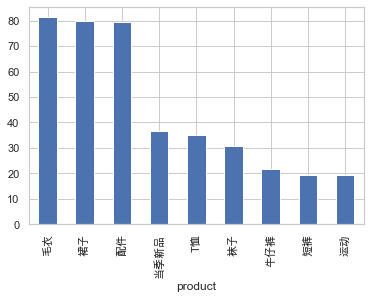

In [56]:
#利润均值
df_clean.groupby('product')['margin'].mean().sort_values(ascending=False).plot(kind='bar');

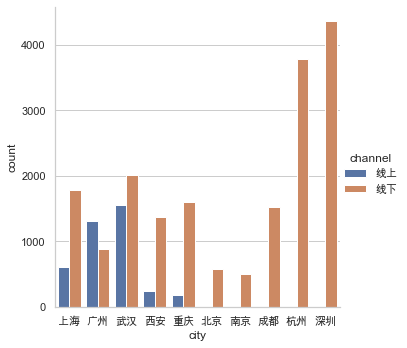

In [57]:
# 城市
tmp = df_clean.groupby(['channel','city'])['count'].count()
tmp = tmp.reset_index()
sns.catplot(x='city',y='count',hue='channel',kind='bar',data=tmp);

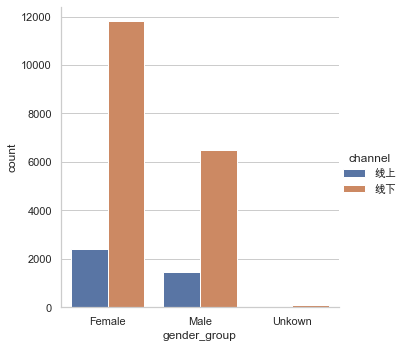

In [58]:
#性别
tmp = df_clean.groupby(['channel','gender_group'])['count'].count()
tmp = tmp.reset_index()
sns.catplot(x='gender_group',y='count',hue='channel',kind='bar',data=tmp);

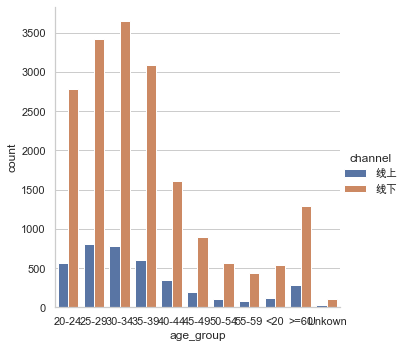

In [49]:
#年龄段
tmp = df_clean.groupby(['channel','age_group'])['count'].count()
tmp = tmp.reset_index()
sns.catplot(x='age_group',y='count',hue='channel',kind='bar',data=tmp);

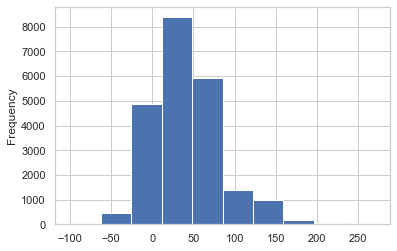

In [50]:
#利润
df_clean['margin'].plot(kind='hist');

In [59]:
plt.rcParams['axes.unicode_minus']=False

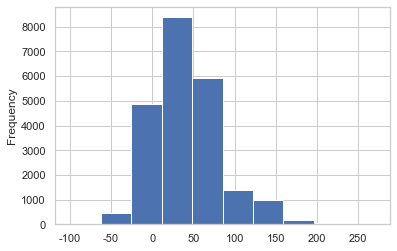

In [60]:
df_clean['margin'].plot(kind='hist');

In [61]:
#聚焦亏本产品
df_loss = df_clean[df_clean['margin']<0]

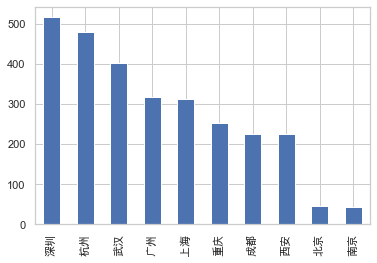

In [62]:
#城市
df_loss['city'].value_counts().plot(kind='bar');

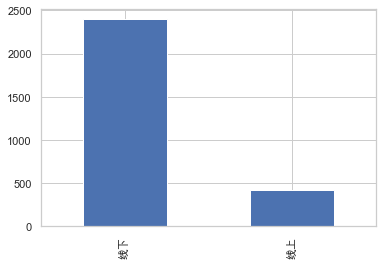

In [63]:
#渠道
df_loss['channel'].value_counts().plot(kind='bar');

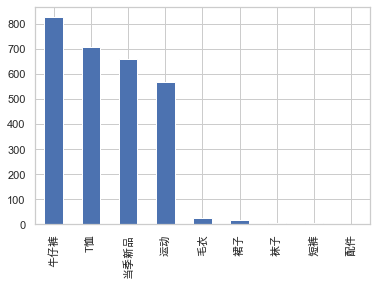

In [64]:
#产品
df_loss['product'].value_counts().plot(kind='bar');

In [65]:
df_clean[['uni_revenue_of_product','unit_cost','margin']].corr()

,uni_revenue_of_product,unit_cost,margin
uni_revenue_of_product,1.000000,0.502248,0.911764
unit_cost,0.502248,1.000000,0.102776
margin,0.911764,0.102776,1.000000
